# Iniciando Aplicação

## Todas as informações contidas neste documento, é para uso pessoal de estudos. 


### Fontes: 
####     -   Seja Um Data Scientist ( youtube ), 
####     -   https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html
### 

# Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px  # função que desenha mapa

# Informações

### Ler um arquivo em uma pasta

In [3]:
df = pd.read_csv('../datasets/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Verificar tipos de variáveis em cada coluna

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### converter de objeto para tipo data

In [5]:
df.date = pd.to_datetime(df.date)
df.date.head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

# Dicionário

### Como criar um dicionário

In [6]:
tabela = {
    "alicate": 45,
    "fenda": 12,
    "philips": 11
}

### Como obter valores do dicionário

In [7]:
tabela['alicate'] + tabela['fenda'] * tabela['philips']

177

# Agrupamento

### Filtrando itens

In [8]:
df_grouped = df[['id', 'bedrooms']].groupby( 'bedrooms') # pode adicionar .size() 


In [9]:
for bedrooms, frame in df_grouped:
    print('Número de quartos: {}'.format(df_grouped.bedrooms))
    print(frame.head(), end= '\n\n')

Número de quartos: <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001693E7B80D0>
              id  bedrooms
875   6306400140         0
3119  3918400017         0
3467  1453602309         0
4868  6896300380         0
6994  2954400190         0

Número de quartos: <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001693E7B8CD0>
             id  bedrooms
154  7920100045         1
264  2123039032         1
350  7325600160         1
465  8658300340         1
648   922049078         1

Número de quartos: <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001693E7B8DF0>
            id  bedrooms
2   5631500400         2
11  9212900260         2
18    16000397         2
23  8091400200         2
31  2426039314         2

Número de quartos: <pandas.core.groupby.generic.SeriesGroupBy object at 0x000001693E7B8CA0>
           id  bedrooms
0  7129300520         3
1  6414100192         3
4  1954400510         3
6  1321400060         3
7  2008000270         3

Número de quarto

# Definir casas decimais

In [10]:
pd.set_option( 'display.float_format', lambda x: '%.2f' %x)

# Desvio Padrão


In [11]:
df[['sqft_living', 'yr_built']].groupby( 'yr_built').std ().reset_index().head()

#__ std() : é a função que calcula o desvio padrão.
#__ reset_index() : reseta as linhas para manter as colunas normais.


,yr_built,sqft_living
0,1900,732.94
1,1901,668.23
2,1902,878.66
3,1903,469.72
4,1904,1076.87


# Criando gráfico de barras

<BarContainer object of 2 artists>

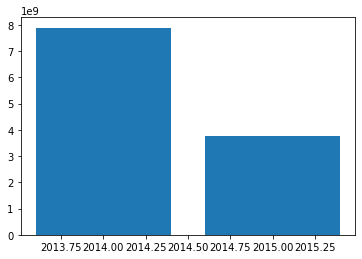

In [12]:
# Ideia: crescimento total de preços de compras dos imóveis por ano.
# Eixo x: Anos
# Eixo y: soma dos preços
# Gráfico: Barras


from matplotlib import pyplot as plt # (Da pasta 'matplotlib', importa 'pyplot')

# gráfico 1
df['year'] = df['date'].dt.year # cria uma coluna 'year' passa os valores do ano da coluna 'date'

by_year = df[['price', 'year']].groupby('year').sum().reset_index() # cria variável que recebe o grupo de preço e ano.

plt.bar(by_year['year'], by_year['price'])

# Criando gráfico Linhas

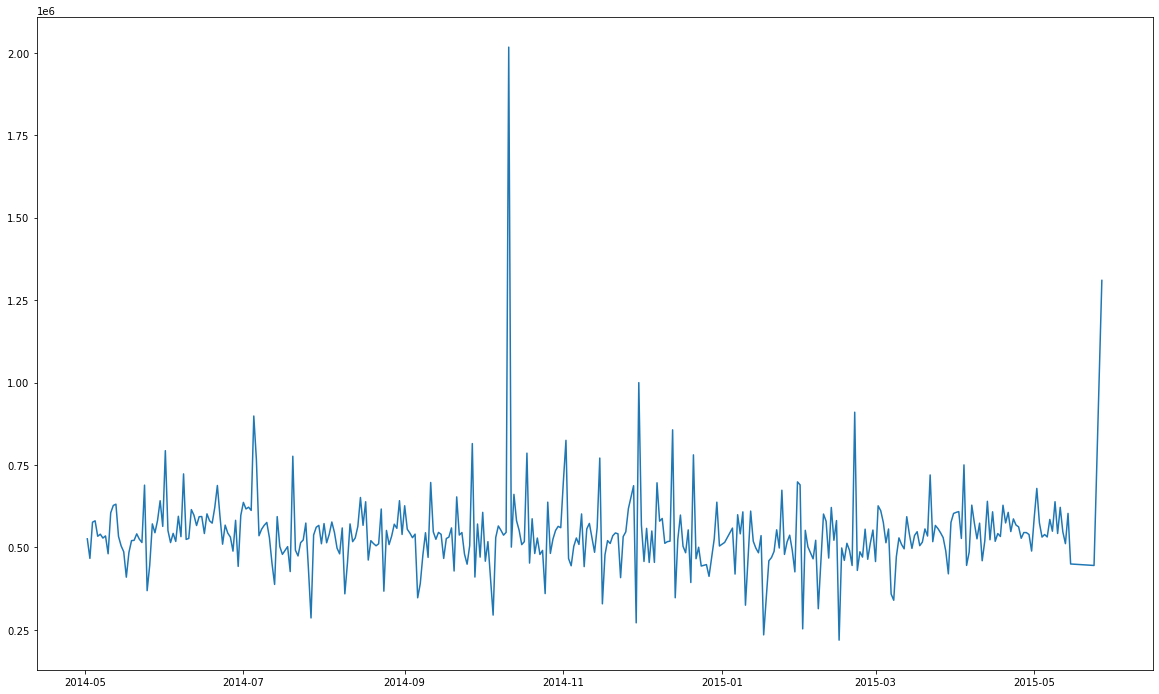

In [13]:
# Ideia: Ver evolução do preço médio
# gráfico 2

df['day'] = pd.to_datetime( df['date'])
by_day = df[['price', 'day']].groupby('day').mean().reset_index()


plt.figure( figsize= (20, 12))
plt.plot( by_day['day'], by_day['price'])



# Gráfico de linhas por semanas

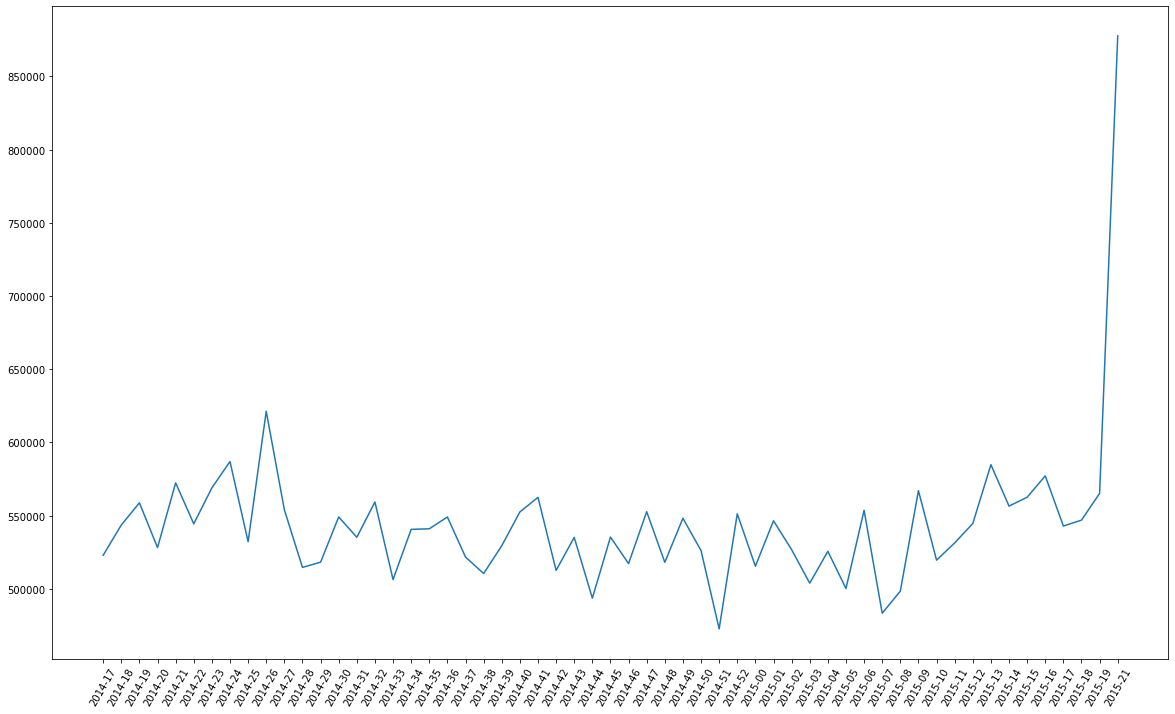

In [14]:
# gráfico 3

df['year_week'] = pd.to_datetime(df['date']).dt.strftime( '%Y-%U' )
by_year_week = df[['price', 'year_week']].groupby( 'year_week' ).mean().reset_index()

plt.figure( figsize= (20, 12))
plt.plot (by_year_week['year_week'], by_year_week ['price'] )
plt.xticks( rotation = 60);

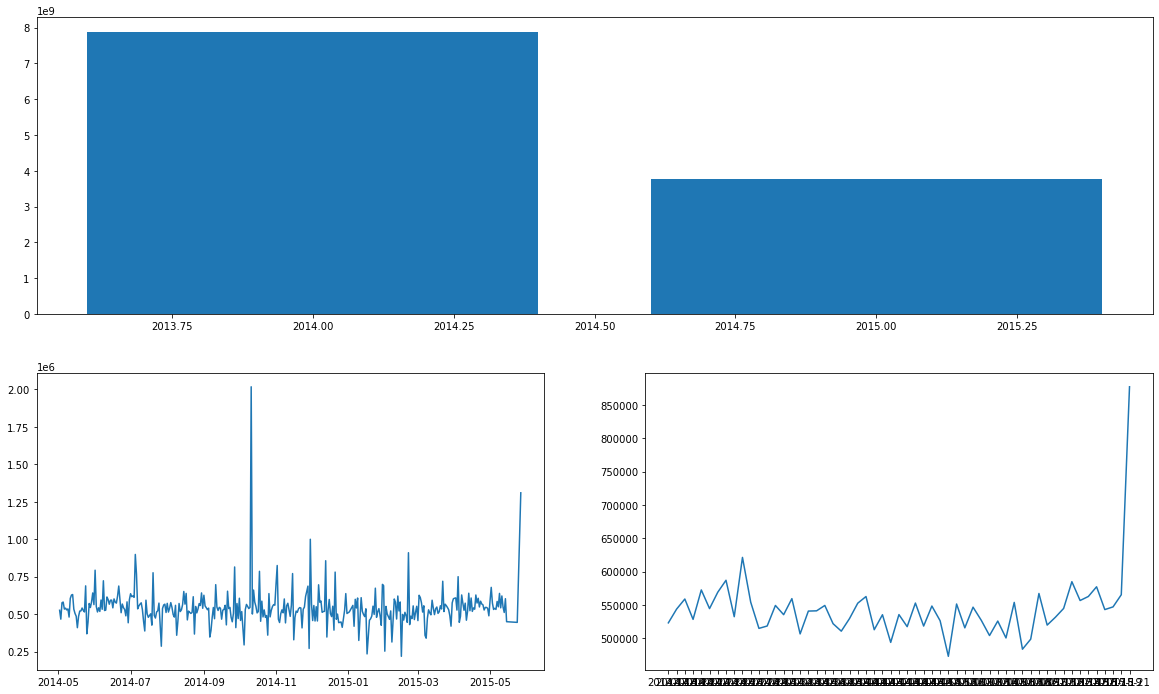

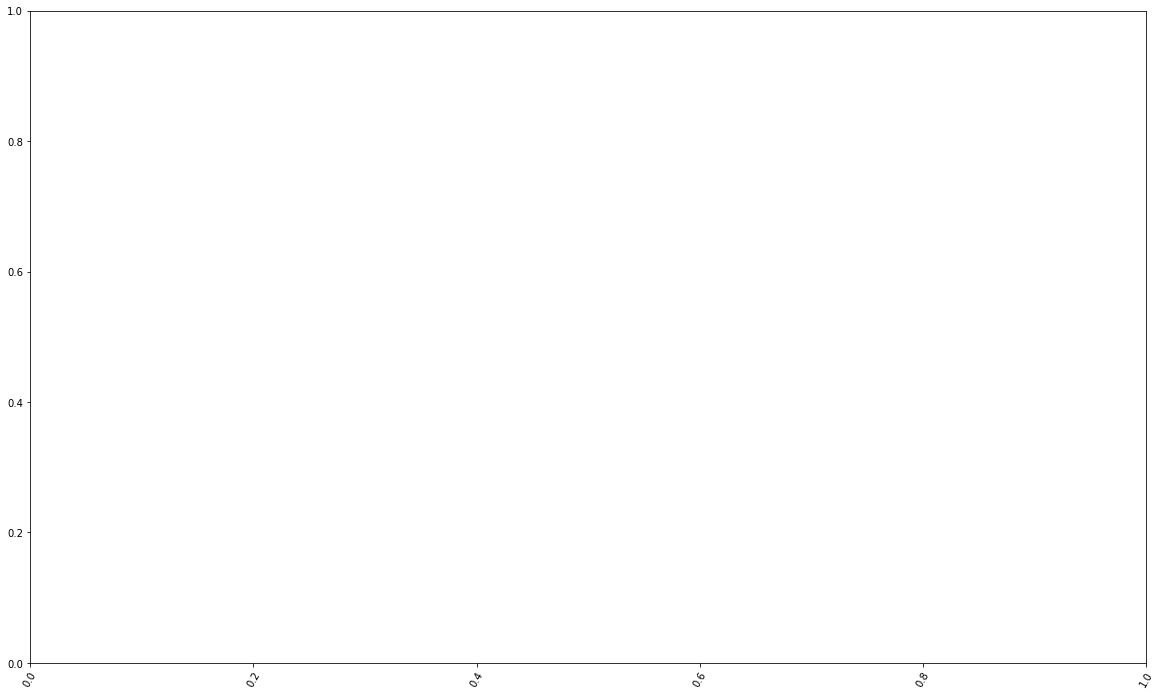

In [15]:
from matplotlib import gridspec

fig = plt.figure (figsize= (20, 12))
specs = gridspec.GridSpec (ncols= 2, nrows=2, figure= fig)


ax1 = fig.add_subplot (specs[0, :]) # primeira linha
ax2 = fig.add_subplot (specs[1, 0]) # segunda linha  - primeira coluna
ax3 = fig.add_subplot (specs[1, 1]) # segunda linha  - segunda coluna


# gráfico
df['year'] = df['date'].dt.year

by_year = df[['price', 'year']].groupby('year').sum().reset_index()

ax1.bar(by_year['year'], by_year['price'])

# gráfico 2
df['day'] = pd.to_datetime( df['date'])
by_day = df[['price', 'day']].groupby('day').mean().reset_index()

plt.figure( figsize= (20, 12))
ax2.plot( by_day['day'], by_day['price'])

# gráfico 3
df['year_week'] = pd.to_datetime(df['date']).dt.strftime( '%Y-%U' )
by_year_week = df[['price', 'year_week']].groupby( 'year_week' ).mean().reset_index()
ax3.plot (by_year_week['year_week'], by_year_week ['price'] )
plt.xticks(rotation=60);